 # Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_excel("Data_Train.xlsx")
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
test=pd.read_excel("Data_Test.xlsx")
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [4]:
print("The shape of training data set : ",train.shape)
print("The shape of testing data set : ",test.shape)

The shape of training data set :  (6019, 12)
The shape of testing data set :  (1234, 11)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [7]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

## Filling null values with mean

In [8]:
seat_mean=train['Seats'].mean()
seat_mean

5.278735151413753

In [9]:
train["Seats"].fillna(5, inplace = True) 

In [10]:
mil = list(train.Mileage)
for i in range(len(mil)):
    try :
        mil[i] = float(mil[i].split(" ")[0].strip())
    except:
        mil[i] = np.nan
train['Mileage']=mil

engine = list(train.Engine)
for i in range(len(engine)):
    try :
        engine[i] = int(engine[i].split(" ")[0].strip())
    except:
        engine[i] = np.nan
train['Engine']=engine

power = list(train.Power)
for i in range(len(power)):
    try :
        power[i] = float(power[i].split(" ")[0].strip())
    except:
        power[i] = np.nan
train['Power']=power

In [11]:
mil = list(test.Mileage)
for i in range(len(mil)):
    try :
        mil[i] = float(mil[i].split(" ")[0].strip())
    except:
        mil[i] = np.nan
test['Mileage']=mil

engine = list(test.Engine)
for i in range(len(engine)):
    try :
        engine[i] = int(engine[i].split(" ")[0].strip())
    except:
        engine[i] = np.nan
test['Engine']=engine

power = list(test.Power)
for i in range(len(power)):
    try :
        power[i] = float(power[i].split(" ")[0].strip())
    except:
        power[i] = np.nan
test['Power']=power

In [12]:
mil_mean=train['Mileage'].mean()
eng_mean=train['Engine'].mean()
pow_mean=train['Power'].mean()
print("Mileage mean: ",mil_mean)
print("Engine mean: ",eng_mean)
print("Power mean: ",pow_mean)

Mileage mean:  18.134960943992073
Engine mean:  1621.276449941501
Power mean:  113.25304969366827


In [13]:
train["Mileage"].fillna(18.13, inplace = True) 
train["Engine"].fillna(1621.27, inplace = True) 
train["Power"].fillna(113.25, inplace = True) 

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [15]:
Company=train['Name'].apply(lambda x:x.split(" ")[0])
train.insert(0,'Company',Company)

In [16]:
Comp=test['Name'].apply(lambda x:x.split(" ")[0])
test.insert(0,'Company',Comp)

In [17]:
train.rename(columns={'Engine':'Engine(cc)','Mileage':'Mileage(kmpl)','Power':'Power(bhp)'},inplace=True)

In [18]:
test.rename(columns={'Engine':'Engine(cc)','Mileage':'Mileage(kmpl)','Power':'Power(bhp)'},inplace=True)

In [19]:
train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [20]:
train['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [21]:
train['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [22]:
train['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [23]:
train.describe()

,Year,Kilometers_Driven,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134959,1621.276411,113.252977,5.276790,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806346,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


## Exploratory Data Analysis

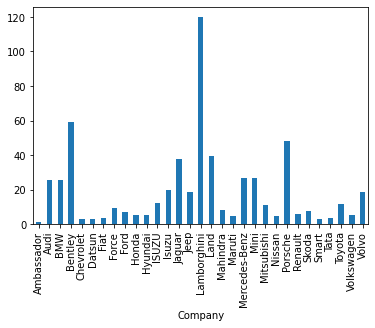

In [24]:
train.groupby('Company').Price.mean().plot(kind='bar')
plt.show()

Lamborghini is the most expensive car and Ambassador being the least

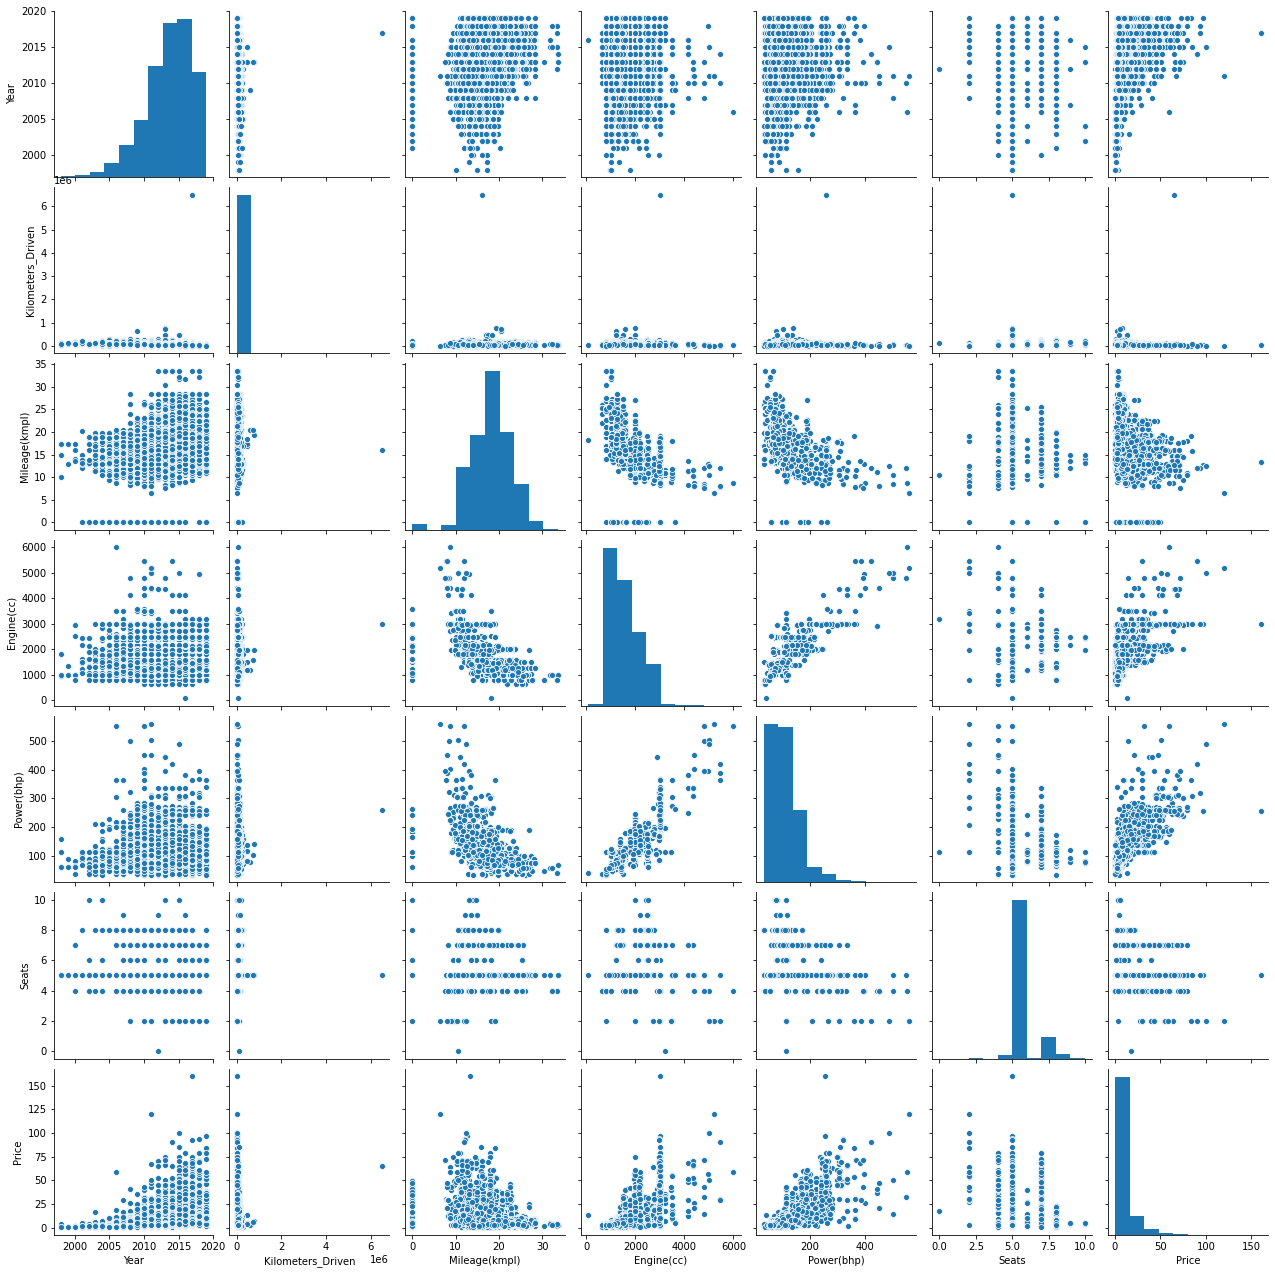

In [25]:
sns.pairplot(train)
plt.show()

In [26]:
train.corr()

,Year,Kilometers_Driven,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price
Year,1.000000,-0.173048,0.321534,-0.051712,0.013898,0.015204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.091029,0.033418,0.082782,-0.011493
Mileage(kmpl),0.321534,-0.065253,1.000000,-0.588353,-0.506799,-0.299631,-0.306588
Engine(cc),-0.051712,0.091029,-0.588353,1.000000,0.859020,0.392982,0.657118
Power(bhp),0.013898,0.033418,-0.506799,0.859020,1.000000,0.100189,0.767331
Seats,0.015204,0.082782,-0.299631,0.392982,0.100189,1.000000,0.052811
Price,0.305327,-0.011493,-0.306588,0.657118,0.767331,0.052811,1.000000


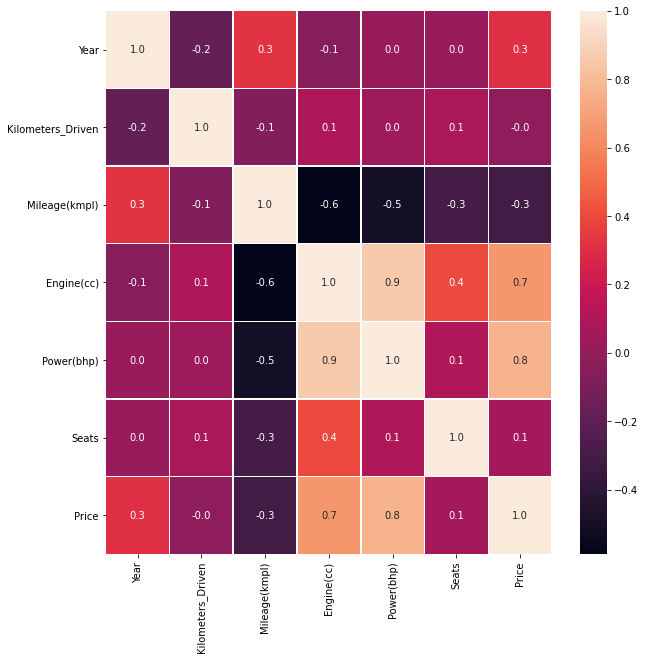

In [27]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(train.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

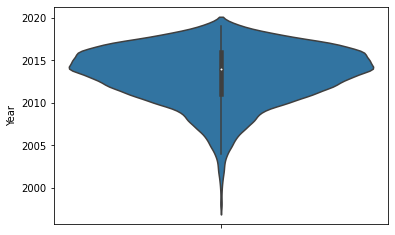

In [28]:
sns.violinplot(y='Year',data=train)

In [29]:
train['Price'].nlargest(10)

4079    160.00
5781    120.00
5919    100.00
1505     97.07
1974     93.67
1984     93.00
4691     90.00
5535     85.00
2095     83.96
1885     79.00
Name: Price, dtype: float64

In [30]:
train[train['Price']>=79]['Company'].unique()


array(['Land', 'Mercedes-Benz', 'BMW', 'Jaguar', 'Lamborghini'],
      dtype=object)

'Land', 'Mercedes-Benz', 'BMW', 'Jaguar', 'Lamborghini' sell the top 10 priced vehicles

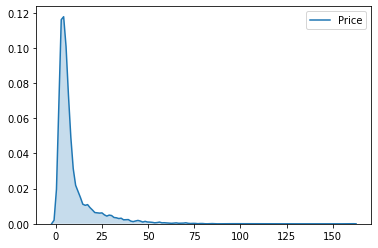

In [31]:
sns.kdeplot(train['Price'],shade=True)

In [32]:
train=train.drop("Name",axis=1)
test=test.drop("Name",axis=1)

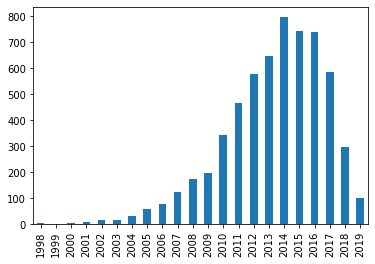

In [33]:
train['Year'].value_counts().sort_index().plot(kind='bar')
plt.show()

Most number of cars were 2014-2016 model

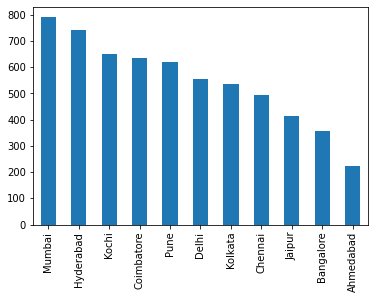

In [34]:
train['Location'].value_counts().plot(kind='bar')
plt.show()

Mumbai is the location where most number of cars are being sold.

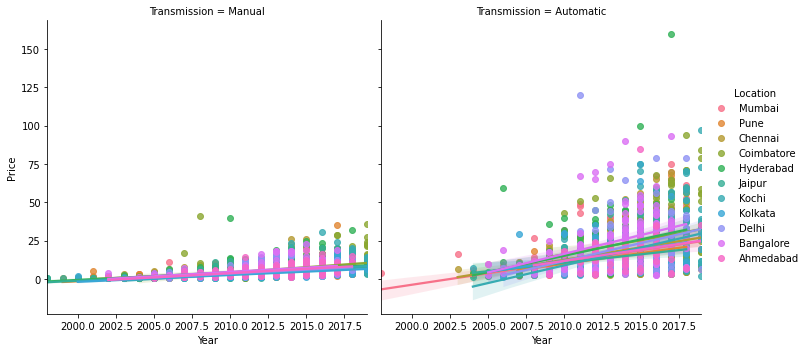

In [35]:
sns.lmplot('Year', 'Price', data=train, hue='Location',col='Transmission')

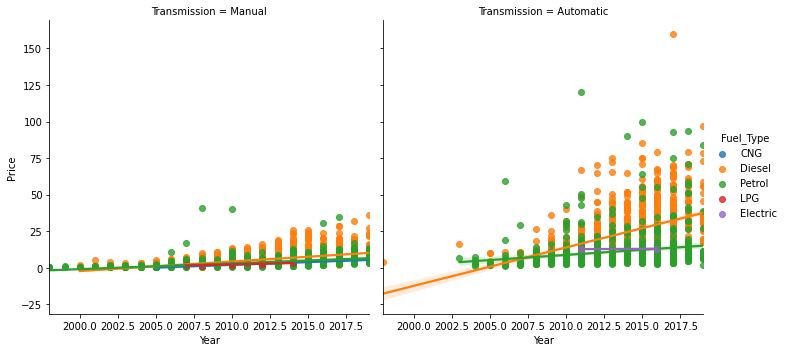

In [36]:
sns.lmplot('Year', 'Price', data=train, hue='Fuel_Type',col='Transmission')

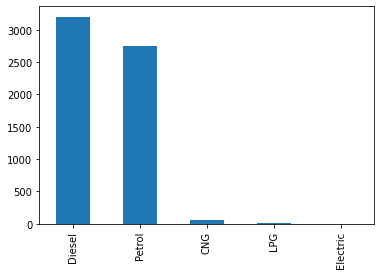

In [37]:
train['Fuel_Type'].value_counts().plot(kind='bar')
plt.show()

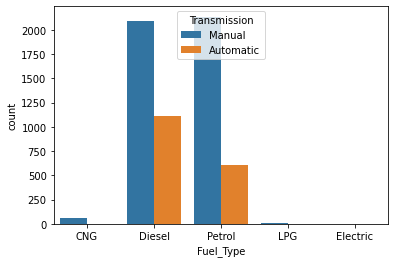

In [38]:
sns.countplot(x="Fuel_Type", data=train, hue = 'Transmission')
plt.show()

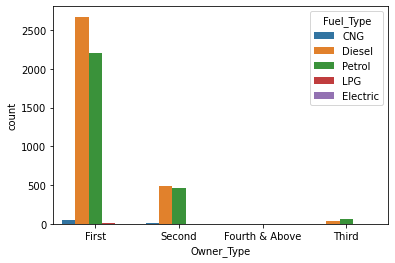

In [39]:
sns.countplot(x="Owner_Type", data=train, hue = 'Fuel_Type')
plt.show()

In [40]:
perc=[]
for i in range(1,101,1):
    perc.append(np.percentile(train['Kilometers_Driven'],i))

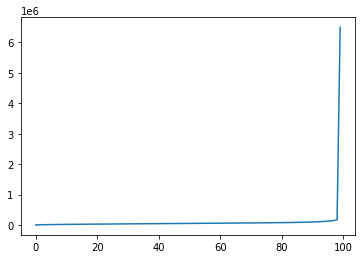

In [41]:
plt.plot(perc)
plt.show()

In [42]:
train[train['Kilometers_Driven']>6000000]

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price
2328,BMW,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


So, this is a possible outlier

In [43]:
train=train[train['Kilometers_Driven']!=6500000]

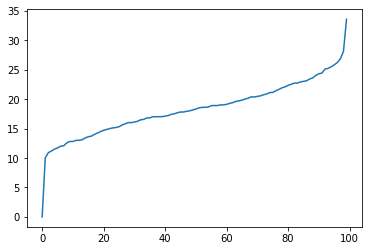

In [44]:
perc=[]
for i in range(1,101,1):
    perc.append(np.percentile(train['Mileage(kmpl)'],i))
plt.plot(perc)
plt.show()

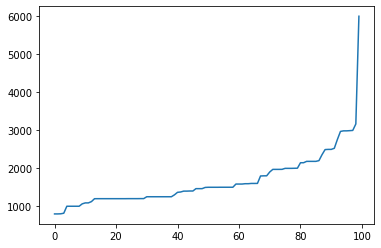

In [45]:
perc=[]
for i in range(1,101,1):
    perc.append(np.percentile(train['Engine(cc)'],i))
plt.plot(perc)
plt.show()

## Normalizing both datasets

In [46]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)']:
    train[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(train[i].values.astype(float).reshape(-1,1))

In [47]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage(kmpl)','Engine(cc)','Power(bhp)']:
    test[i]=MinMaxScaler(feature_range=(0,1)).fit_transform(test[i].values.astype(float).reshape(-1,1))

## XGB Regressor

In [48]:
from sklearn.model_selection import train_test_split

Y = np.log1p(train.Price)  
X = train.drop(['Price'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.10,random_state=0)

In [49]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
label_enc = LabelEncoder()


X_train['Company'] = label_enc.fit_transform(X_train['Company'])
X_test['Company'] = label_enc.transform(X_test['Company'])
test['Company'] = label_enc.fit_transform(test['Company'])

X_train['Location'] = label_enc.fit_transform(X_train['Location'])
X_test['Location'] = label_enc.transform(X_test['Location'])
test['Location'] = label_enc.fit_transform(test['Location'])

X_train['Fuel_Type'] = label_enc.fit_transform(X_train['Fuel_Type'])
X_test['Fuel_Type'] = label_enc.transform(X_test['Fuel_Type'])
test['Fuel_Type'] = label_enc.fit_transform(test['Fuel_Type'])

X_train['Transmission'] = label_enc.fit_transform(X_train['Transmission'])
X_test['Transmission'] = label_enc.transform(X_test['Transmission'])
test['Transmission'] = label_enc.fit_transform(test['Transmission'])

X_train['Owner_Type'] = label_enc.fit_transform(X_train['Owner_Type'])
X_test['Owner_Type'] = label_enc.transform(X_test['Owner_Type'])
test['Owner_Type'] = label_enc.fit_transform(test['Owner_Type'])

In [50]:
X_train.head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats
5899,18,9,2013,0.083669,1,1,2,0.575432,0.198448,0.075504,5.0
3606,9,4,2015,0.068181,4,1,0,0.530710,0.240466,0.158045,5.0
1108,18,9,2016,0.030754,4,1,0,0.736434,0.122173,0.024914,5.0
1547,17,10,2015,0.115934,1,1,2,0.627013,0.234391,0.058577,5.0
873,28,3,2015,0.130566,1,0,0,0.374180,0.491056,0.255420,7.0


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5416 entries, 5899 to 2733
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            5416 non-null   int64  
 1   Location           5416 non-null   int64  
 2   Year               5416 non-null   int64  
 3   Kilometers_Driven  5416 non-null   float64
 4   Fuel_Type          5416 non-null   int64  
 5   Transmission       5416 non-null   int64  
 6   Owner_Type         5416 non-null   int64  
 7   Mileage(kmpl)      5416 non-null   float64
 8   Engine(cc)         5416 non-null   float64
 9   Power(bhp)         5416 non-null   float64
 10  Seats              5416 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 507.8 KB


In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
from math import sqrt
model = XGBRegressor(n_estimators=1000, learning_rate=0.06)
model.fit(X_train, Y_train, 
             early_stopping_rounds=20, 
             eval_set=[(X_test, Y_test)], 
             verbose=False)

pred1 = model.predict(X_test)
print("MAE: " + str(mean_absolute_error(pred1, Y_test)))
print("MSE: " + str(mean_squared_error(pred1, Y_test)))
print("RMS: " + str(sqrt(mean_squared_error(pred1, Y_test))))
print("MSLE: " + str(mean_squared_log_error(pred1, Y_test)))

df1= pd.DataFrame({'Actual': Y_test, 'Predicted': pred1})
df1

MAE: 0.10457666491447762
MSE: 0.021794685656373228
RMS: 0.14763023286702906
MSLE: 0.0024874193326152377


,Actual,Predicted
257,1.047319,0.883847
4350,3.109953,3.120032
1551,1.208960,1.243154
5797,1.208960,1.277942
134,4.007333,3.774251
...,...,...
1984,4.543295,3.904941
1066,1.658228,1.582815
3355,2.030776,2.294495
4292,2.903069,2.647578


In [53]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred1))

0.9633179458475712


## Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
pred2 = reg.predict(X_test)

In [56]:
df2 = pd.DataFrame({'Actual': Y_test, 'Predicted': pred2})
df2

,Actual,Predicted
257,1.047319,0.869154
4350,3.109953,3.063291
1551,1.208960,1.233072
5797,1.208960,1.340899
134,4.007333,4.168270
...,...,...
1984,4.543295,4.143925
1066,1.658228,1.709578
3355,2.030776,2.946607
4292,2.903069,2.683410


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
print("MAE: " + str(mean_absolute_error(pred2, Y_test)))
print("MSE: " + str(mean_squared_error(pred2, Y_test)))

MAE: 0.19704562082848198
MSE: 0.06343382528773107


In [58]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred2))

0.8932362204719466


## SVM

In [59]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [61]:
regressor = SVR(kernel='poly')
regressor.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
pred3 = regressor.predict(X_test)

In [63]:
df3= pd.DataFrame({'Actual': Y_test, 'Predicted': pred3})
df3

,Actual,Predicted
257,1.047319,1.128584
4350,3.109953,3.318721
1551,1.208960,1.214448
5797,1.208960,1.374484
134,4.007333,4.770208
...,...,...
1984,4.543295,4.739808
1066,1.658228,1.773296
3355,2.030776,3.149659
4292,2.903069,2.338193


In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
print("MAE: " + str(mean_absolute_error(pred3, Y_test)))
print("MSE: " + str(mean_squared_error(pred3, Y_test)))

MAE: 0.17876218789214343
MSE: 0.06119701999831524


Text(0, 0.5, 'Predicted')

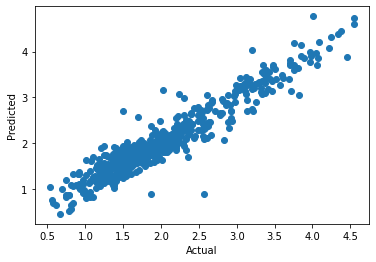

In [65]:
plt.scatter(Y_test,pred3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [66]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred3))

0.8970009277977804


## Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor

regressor1 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor1.fit(X_train, Y_train)
pred4 = regressor1.predict(X_test)

In [68]:
df4= pd.DataFrame({'Actual': Y_test, 'Predicted': pred4})
df4

,Actual,Predicted
257,1.047319,0.961599
4350,3.109953,3.062452
1551,1.208960,1.214082
5797,1.208960,1.266424
134,4.007333,4.023974
...,...,...
1984,4.543295,4.103759
1066,1.658228,1.680624
3355,2.030776,2.414886
4292,2.903069,2.673524


In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
print("MAE: " + str(mean_absolute_error(pred4, Y_test)))
print("MSE: " + str(mean_squared_error(pred4, Y_test)))

MAE: 0.1453855428305536
MSE: 0.03698539584695161


Text(0, 0.5, 'Predicted')

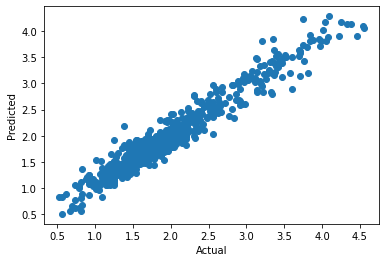

In [70]:
plt.scatter(Y_test,pred4)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [71]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred4))

0.9377508666700973


## Decision Tree Regressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state=0)
regressor2.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [73]:
pred5=regressor2.predict(X_test)

In [74]:
df5= pd.DataFrame({'Actual': Y_test, 'Predicted': pred5})
df5

,Actual,Predicted
257,1.047319,1.406097
4350,3.109953,3.159126
1551,1.208960,1.163151
5797,1.208960,1.178655
134,4.007333,4.442181
...,...,...
1984,4.543295,4.262680
1066,1.658228,1.536867
3355,2.030776,1.832581
4292,2.903069,2.525729


In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
print("MAE: " + str(mean_absolute_error(pred5, Y_test)))
print("MSE: " + str(mean_squared_error(pred5, Y_test)))

MAE: 0.2026646820595415
MSE: 0.08184736303150834


In [76]:
from sklearn.metrics import r2_score
print(r2_score(Y_test,pred5))

0.862244886194202


### The best model is XGB Regressor since it has the best accuracy and therefore it can be used for prediction

In [77]:
test.head()

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats
0,16,4,2014,0.114410,0,1,0,1.000000,0.069594,0.041251,4.0
1,16,3,2013,0.153275,3,1,2,0.765654,0.032006,0.022516,5.0
2,26,9,2017,0.094556,1,1,0,0.424055,0.329178,0.195256,7.0
3,26,5,2012,0.395415,1,1,0,0.731246,0.137700,NaN,5.0
4,9,9,2014,0.080229,3,1,0,0.573466,0.106624,0.083620,5.0


In [78]:
test=test.dropna()
pred = model.predict(test)
pred=np.exp(pred)-1

In [79]:
test['Price']=pred

In [80]:
test

,Company,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine(cc),Power(bhp),Seats,Price
0,16,4,2014,0.114410,0,1,0,1.000000,0.069594,0.041251,4.0,2.760039
1,16,3,2013,0.153275,3,1,2,0.765654,0.032006,0.022516,5.0,4.667047
2,26,9,2017,0.094556,1,1,0,0.424055,0.329178,0.195256,7.0,11.114878
4,9,9,2014,0.080229,3,1,0,0.573466,0.106624,0.083620,5.0,3.193831
5,15,3,2016,0.242433,1,1,2,0.495970,0.289356,0.181849,7.0,10.486159
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,27,5,2011,0.253327,1,1,0,0.636702,0.181243,0.119285,5.0,2.450757
1230,27,9,2015,0.166189,3,0,0,0.533478,0.106624,0.119285,5.0,4.130428
1231,20,8,2012,0.077364,1,1,0,0.715437,0.155750,0.049673,5.0,2.326451
1232,27,10,2013,0.146883,3,0,3,0.533168,0.106624,0.119285,5.0,2.625389
